In [96]:
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


In [37]:
df = pd.read_excel("data.xlsx")

In [38]:
# Feature Engineering
df['hour'] = df['Date/Time'].dt.hour
df['day_of_week'] = df['Date/Time'].dt.dayofweek
df["month"] = df["Date/Time"].dt.month_name()

In [69]:
df

,Date/Time,Constraint DA,Constraint RT,Wind,Solar,AEP Load,ATSI Load,COMED Load,DOM Load,hour,day_of_week,month
0,2021-07-01 01:00:00,0.0,0.0,753.281,0.0,14236,7455,11651,14123,1,3,July
1,2021-07-01 02:00:00,0.0,0.0,738.755,0.0,13636,7091,10871,13345,2,3,July
2,2021-07-01 03:00:00,0.0,0.0,724.276,0.0,13171,6850,10313,12765,3,3,July
3,2021-07-01 04:00:00,0.0,0.0,752.041,0.0,12962,6714,9925,12393,4,3,July
4,2021-07-01 05:00:00,0.0,0.0,759.611,0.0,13060,6730,9731,12293,5,3,July
...,...,...,...,...,...,...,...,...,...,...,...,...
4412,2021-12-31 20:00:00,0.0,0.0,3327.337,0.0,13549,7346,10776,11545,20,4,December
4413,2021-12-31 21:00:00,0.0,0.0,3330.132,0.0,13294,7164,10616,11251,21,4,December
4414,2021-12-31 22:00:00,0.0,0.0,3343.444,0.0,12985,6948,10420,10863,22,4,December
4415,2021-12-31 23:00:00,0.0,0.0,3418.329,0.0,12579,6669,10155,10329,23,4,December


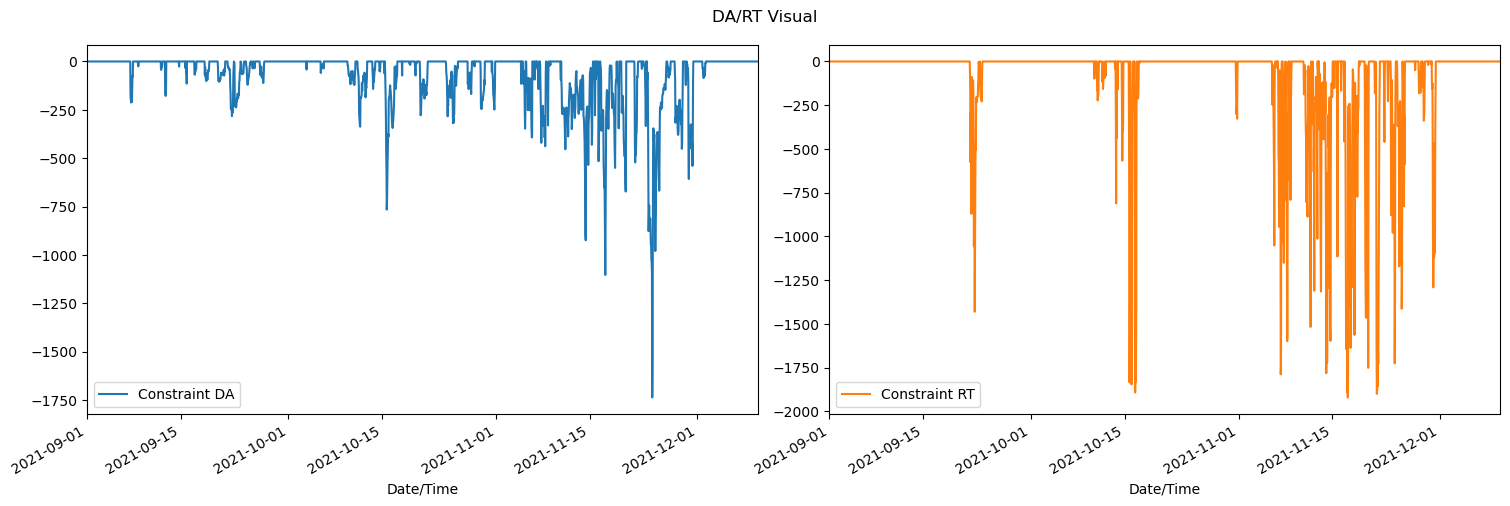

In [99]:
# Convert 'Date/Time' to datetime object
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

load_cols = ['Constraint DA', 'Constraint RT']

df.set_index('Date/Time')[load_cols].plot(subplots=True, layout=(-1, 2), figsize=(15, 5), title="DA/RT Visual")
plt.tight_layout()

start_date = datetime.datetime(2021, 9, 1)
end_date = datetime.datetime(2021, 12, 10)
plt.xlim([start_date, end_date])

plt.show()


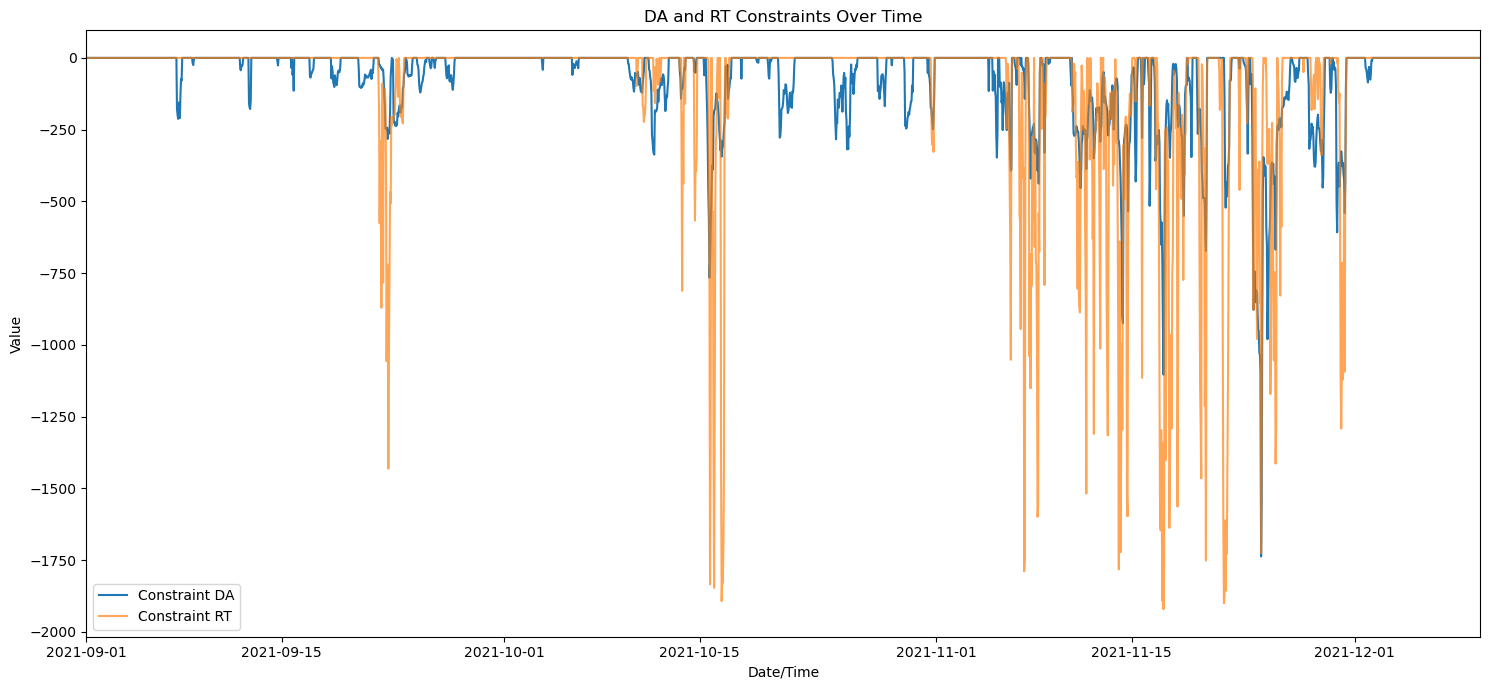

In [108]:
plt.figure(figsize=(15, 7))
plt.plot(df['Date/Time'], df['Constraint DA'], label='Constraint DA')
plt.plot(df['Date/Time'], df['Constraint RT'], label='Constraint RT', alpha=0.7)
plt.title('DA and RT Constraints Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Value')
plt.legend(loc='best')
start_date = datetime.datetime(2021, 9, 1)
end_date = datetime.datetime(2021, 12, 10)
plt.xlim([start_date, end_date])
plt.tight_layout()
plt.show()


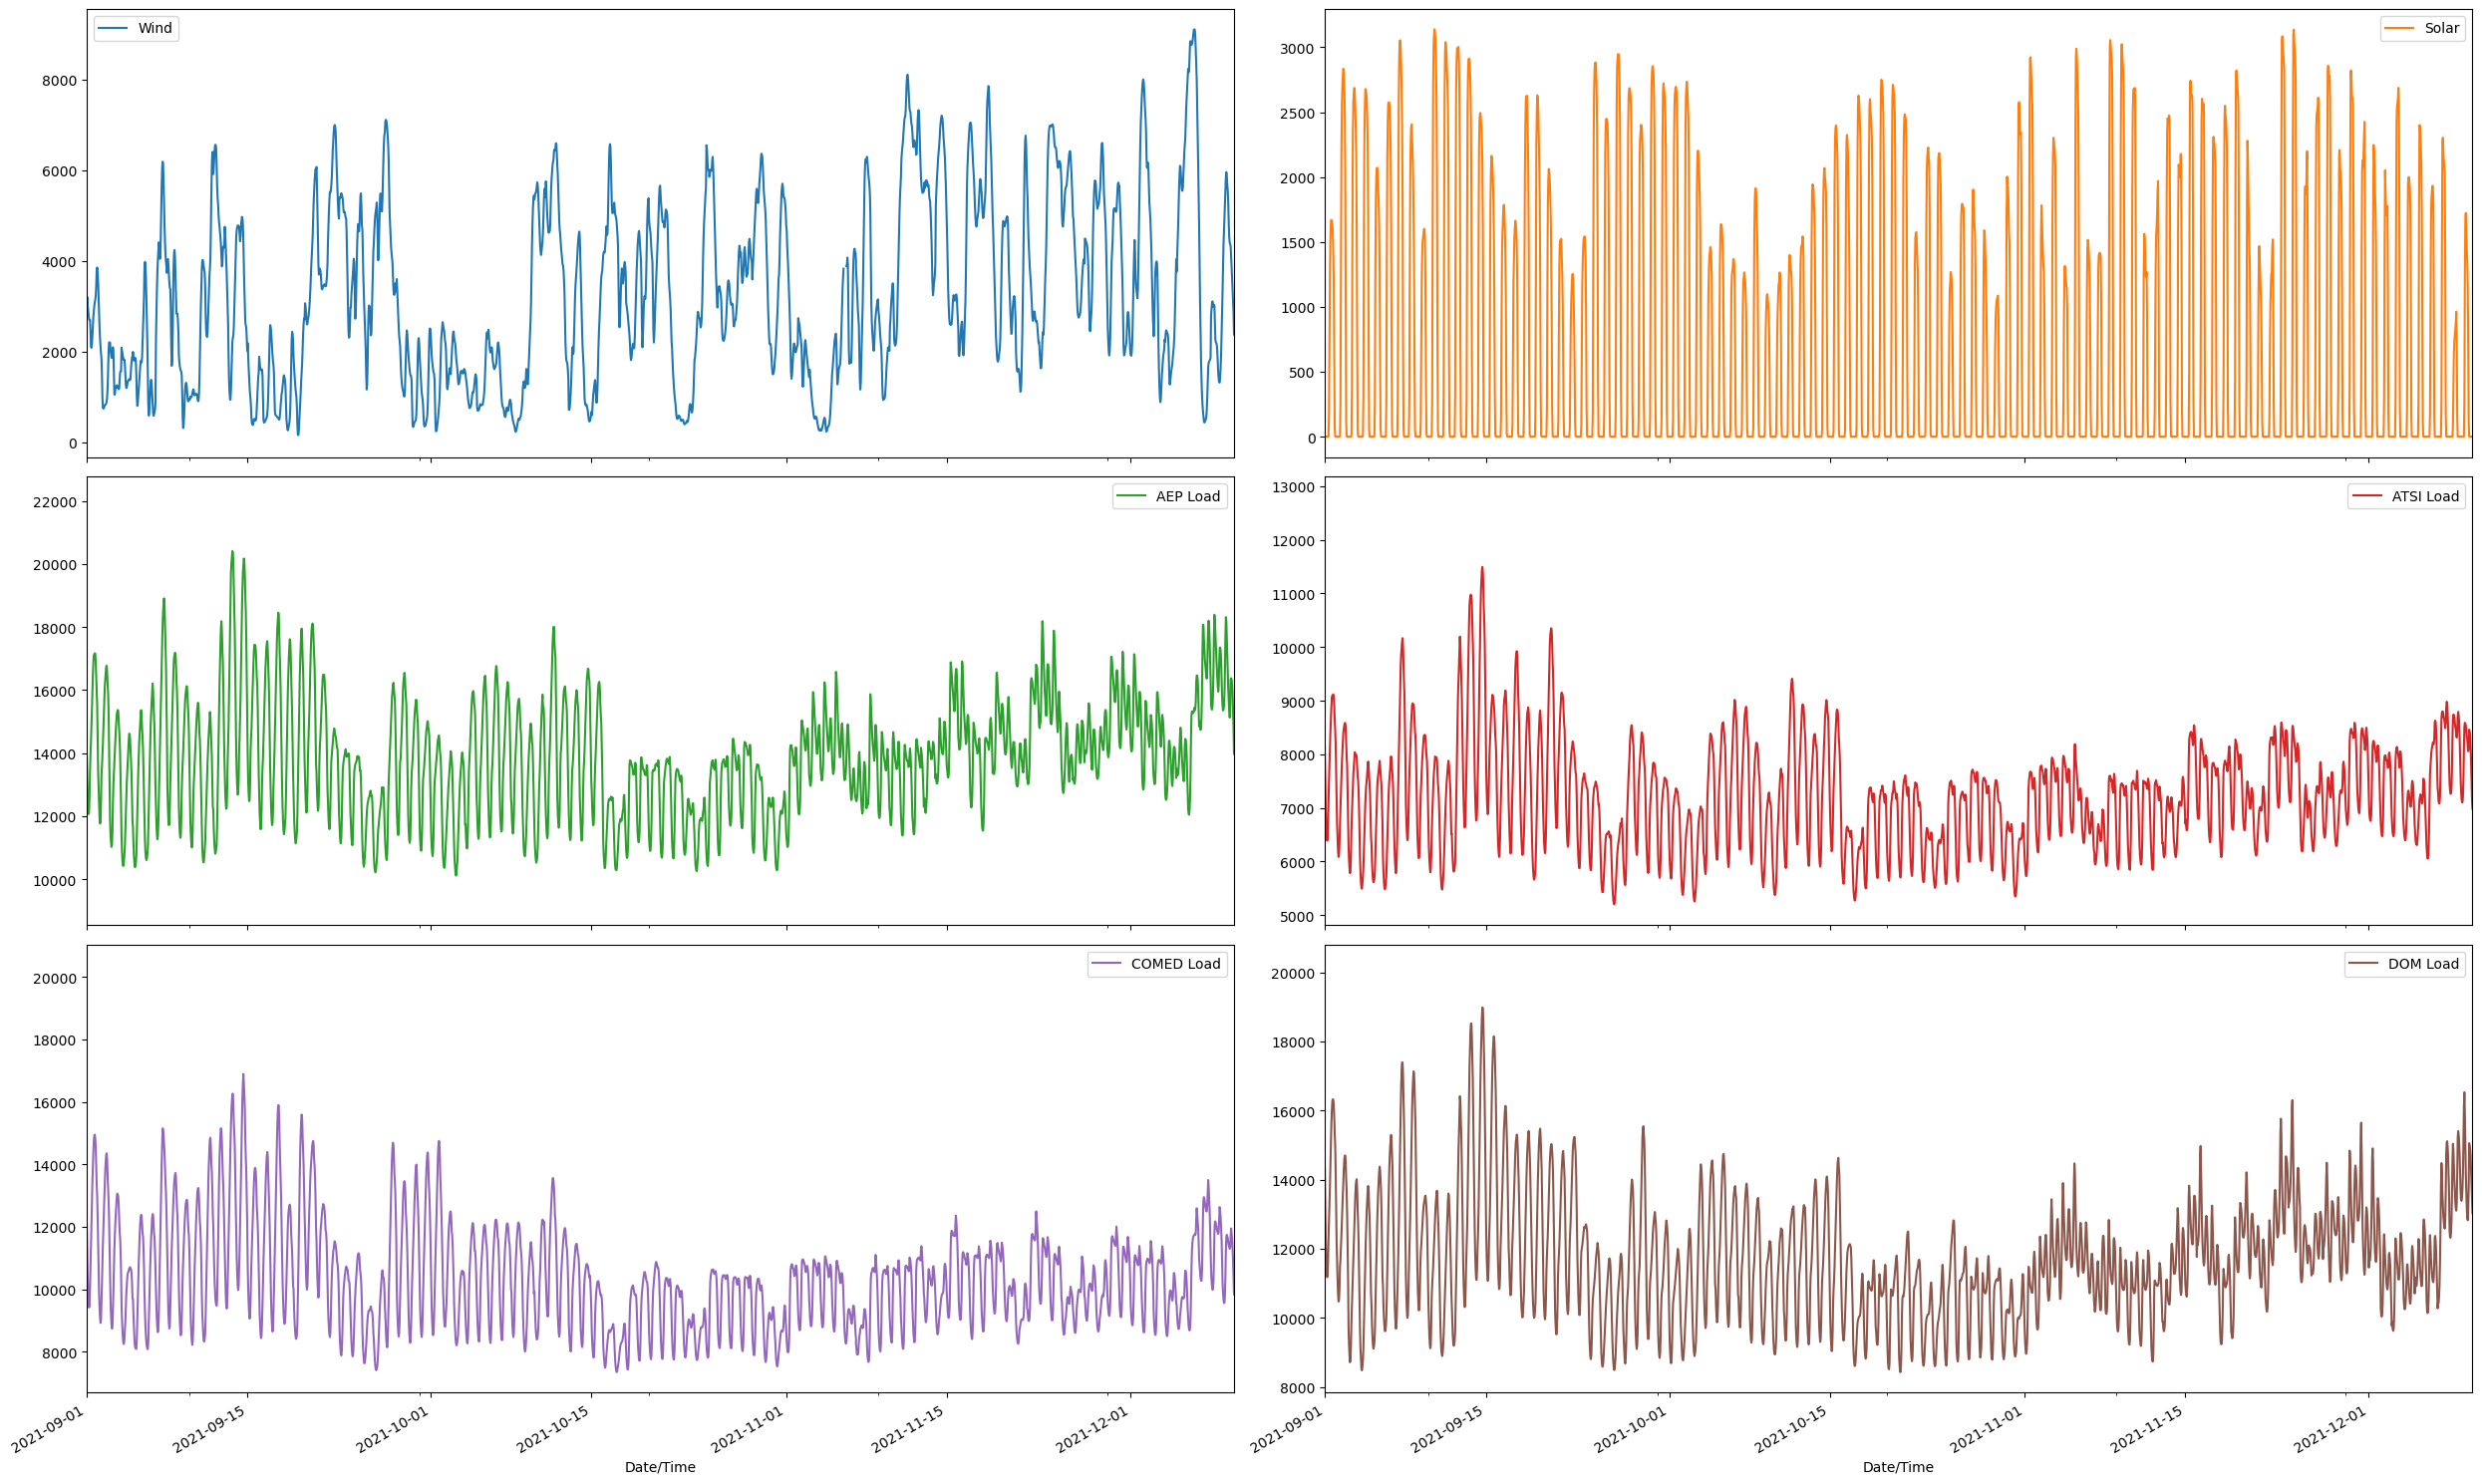

In [100]:
load_cols = ['Wind', 'Solar', 'AEP Load', 'ATSI Load', 'COMED Load', 'DOM Load']

df.set_index('Date/Time')[load_cols].plot(subplots=True, layout=(-1, 2), figsize=(25, 15))

start_date = datetime.datetime(2021, 9, 1)
end_date = datetime.datetime(2021, 12, 10)
plt.xlim([start_date, end_date])

plt.tight_layout()
plt.show()


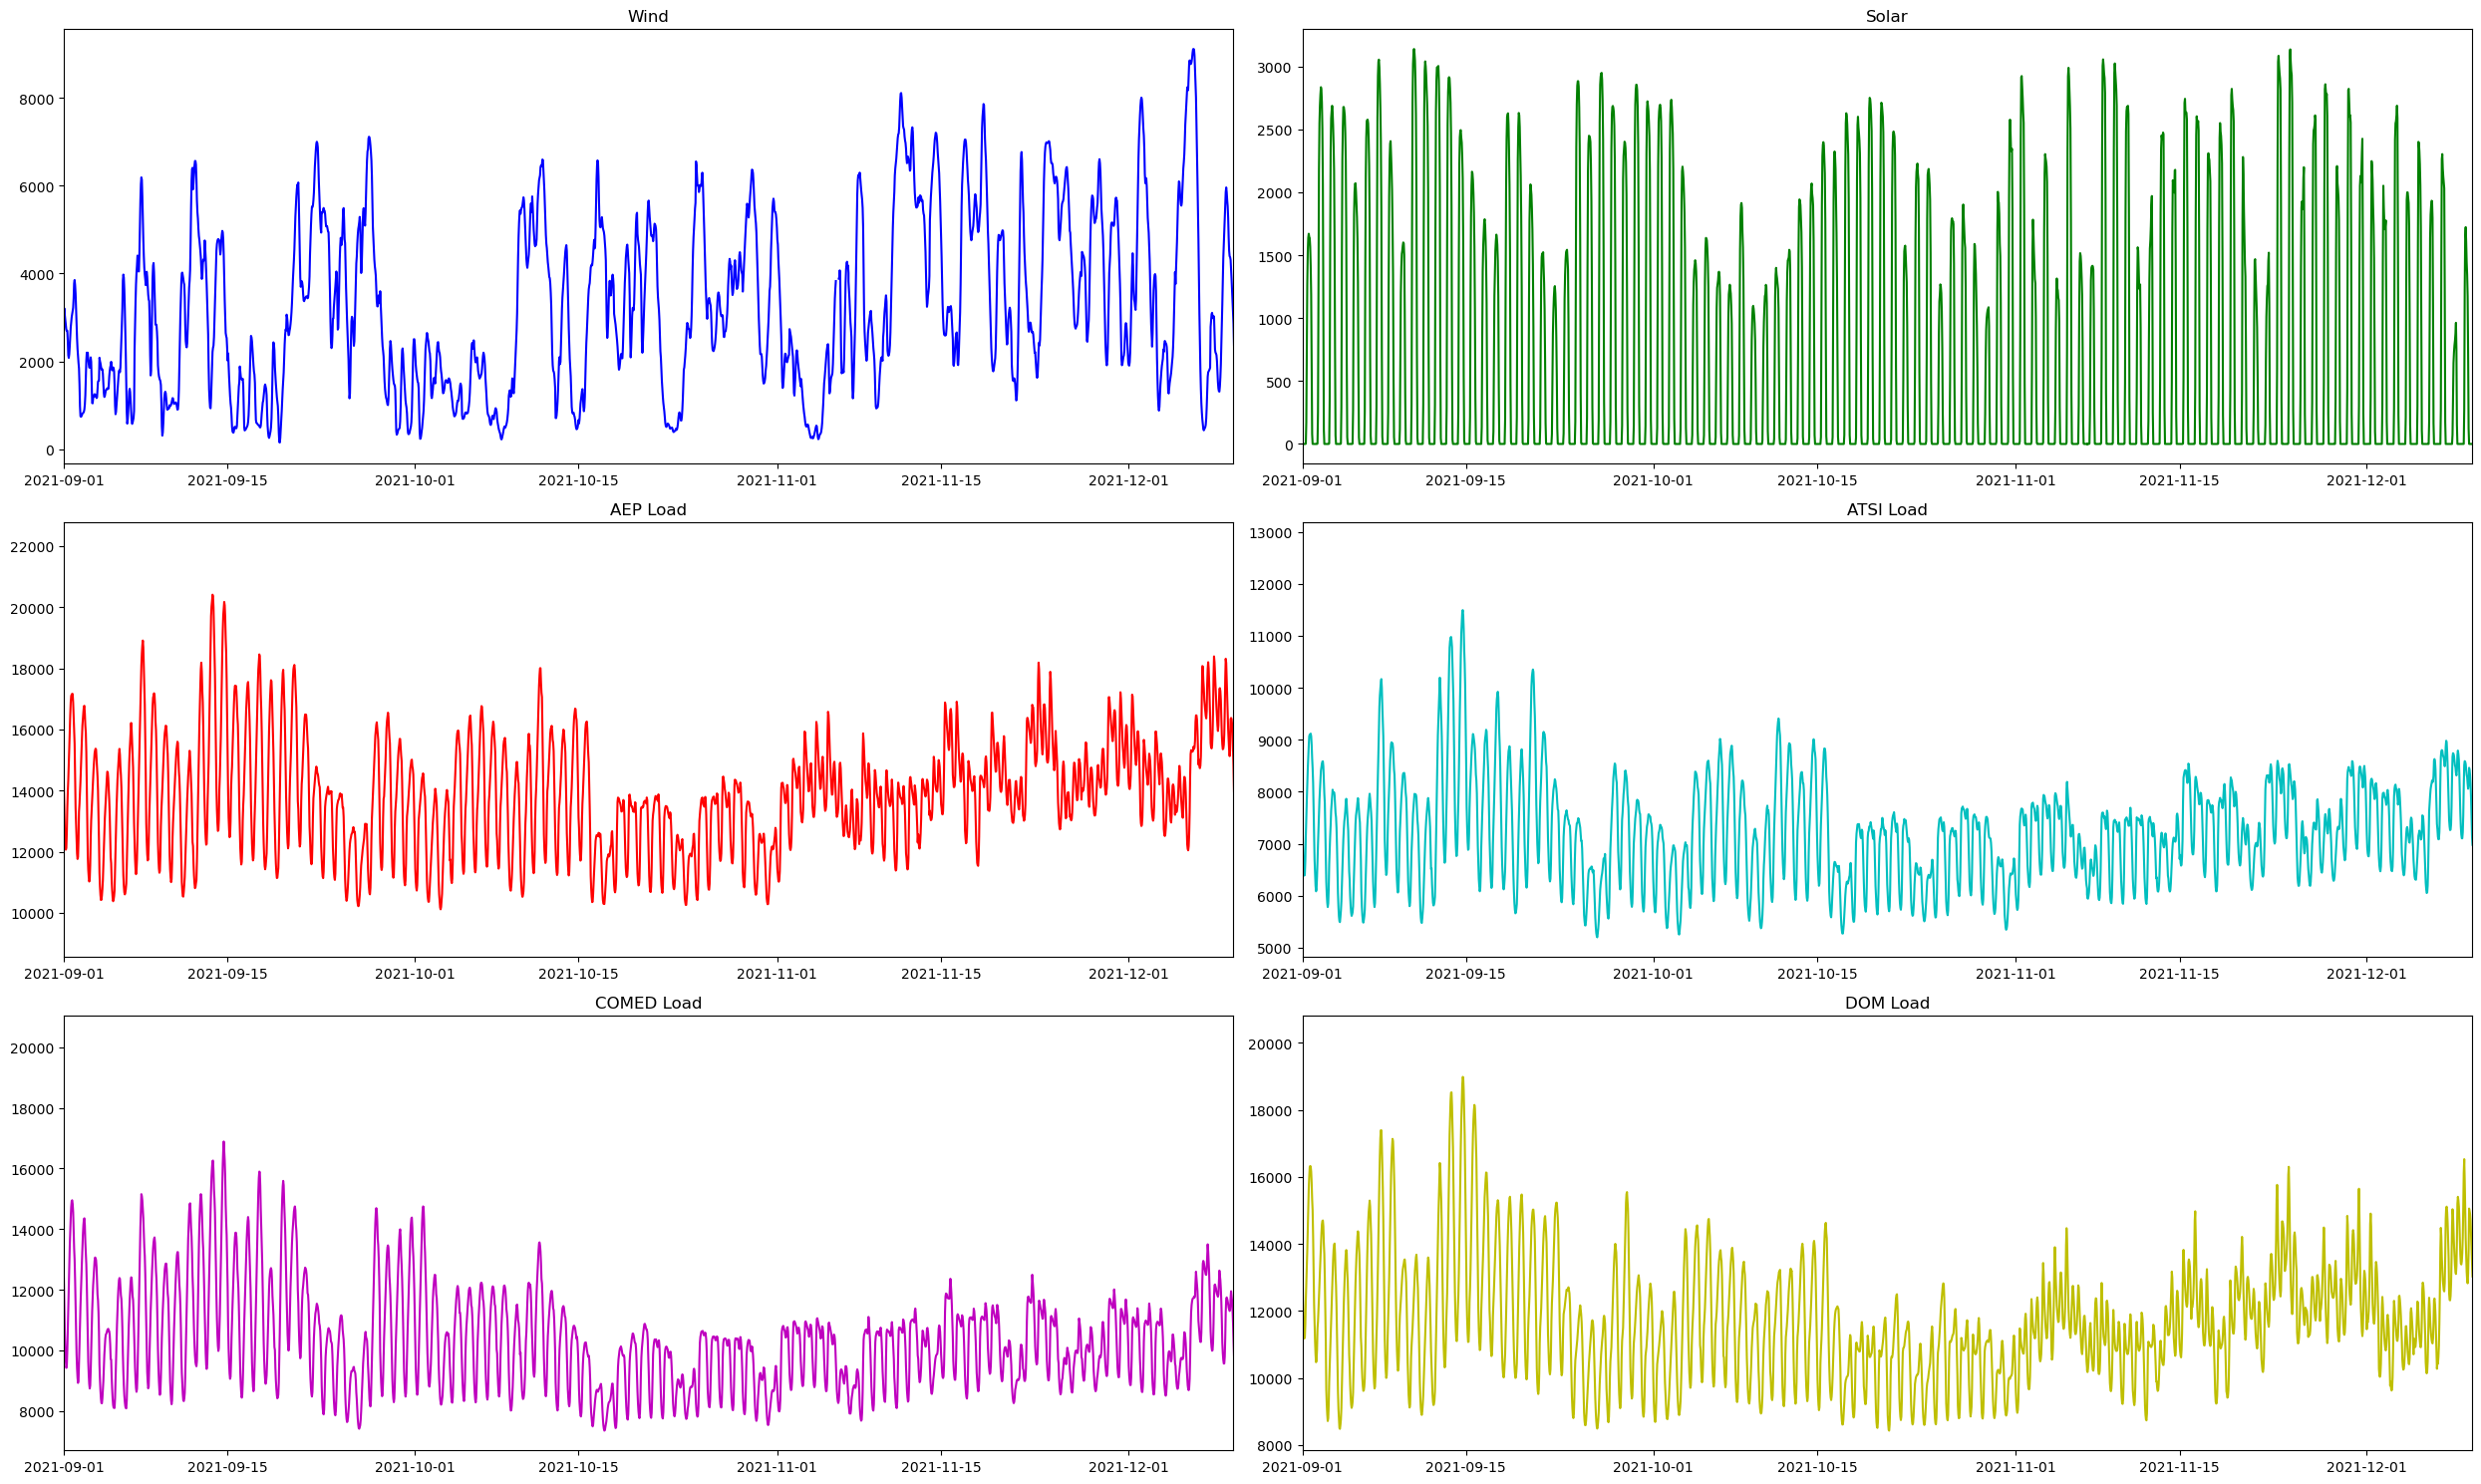

In [110]:
load_cols = ['Wind', 'Solar', 'AEP Load', 'ATSI Load', 'COMED Load', 'DOM Load']

colors = ['b', 'g', 'r', 'c', 'm', 'y']

fig, axs = plt.subplots(len(load_cols)//2, 2, figsize=(25, 15))  # Create a grid of 
axs = axs.ravel()  # Flatten the grid into a 1D array to iterate over

start_date = datetime.datetime(2021, 9, 1)
end_date = datetime.datetime(2021, 12, 10)

for i, col in enumerate(load_cols):
    axs[i].plot(df['Date/Time'], df[col], color=colors[i % len(colors)])  # Use a different color for each plot
    axs[i].set_title(col)  # Set the title for each subplot
    axs[i].set_xlim([start_date, end_date])  # Set the x-axis limits for each subplot

plt.tight_layout()
plt.show()
